We want to calculate the distances between the centers of mass of each parcel in the Glasser (2016) atlas. 

To get the data, we are loosely following directions from the load_hcp ipynb at [NeuromatchAcademy](https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/main/projects/fMRI/load_hcp.ipynb#scrollTo=7cClEjP1FXdO). First, we download [hcp_rest.tgz](https://osf.io/j5kuc/download) and [atlas.npz](https://osf.io/j5kuc/download) from OSF. We extract the regions list using:

tar -xzf hcp_rest.tgz hcp_rest/regions.npy

In [2]:
# @title Setup and Load Data
import os
from scipy.spatial.distance import pdist, squareform
import nibabel as nib
import numpy as np
from nilearn import image, datasets, plotting
import os

HCP_DIR="./"
N_PARCELS = 360
TR = 0.72  # Time resolution, in sec
HEMIS = ["Right", "Left"]

dir = os.path.join(HCP_DIR, "hcp_rest")
regions = np.load(os.path.join(dir, "regions.npy")).T
region_names=regions[0].tolist()
print(region_names[:10])

with np.load(f"hcp_atlas.npz") as dobj:
  atlas = dict(**dobj)

print(atlas)

atlas['coords'].shape

['R_V1', 'R_MST', 'R_V6', 'R_V2', 'R_V3', 'R_V4', 'R_V8', 'R_4', 'R_3b', 'R_FEF']
{'labels_R': array([ 54, 116,  50, ..., 134, 134, 134], dtype=int32), 'labels_L': array([233, 228, 220, ..., 301, 301, 306], dtype=int32), 'coords': array([[ 13.88705062, -79.36989109,   2.95539586],
       [ 43.31077929, -65.46435175,   3.65888316],
       [ 17.07818631, -76.27357601,  28.4532264 ],
       ...,
       [-43.66333418,  -6.4398113 , -15.54653597],
       [-10.61476522,  29.20779575,  26.91586381],
       [ -4.58484419,  34.61082077,  15.00143417]])}


(360, 3)

In [4]:
np.save("glasser_labels.npy",region_names)
np.save("glasser_networks.npy",regions[1])
with open(r'./glasser_labels.txt','w') as fp:
    fp.write('\n'.join(region_names))
with open(r'./glasser_networks.txt','w') as fp:
    fp.write('\n'.join(regions[1]))

In [3]:
regions[1]

array(['Visual1', 'Visual2', 'Visual2', 'Visual2', 'Visual2', 'Visual2',
       'Visual2', 'Somatomotor', 'Somatomotor', 'Cingulo-Oper',
       'Language', 'Default', 'Visual2', 'Frontopariet', 'Frontopariet',
       'Visual2', 'Visual2', 'Visual2', 'Visual2', 'Visual2', 'Visual2',
       'Visual2', 'Visual2', 'Auditory', 'Default', 'Default',
       'Dorsal-atten', 'Default', 'Frontopariet', 'Posterior-Mu',
       'Posterior-Mu', 'Posterior-Mu', 'Posterior-Mu', 'Posterior-Mu',
       'Posterior-Mu', 'Somatomotor', 'Cingulo-Oper', 'Cingulo-Oper',
       'Somatomotor', 'Somatomotor', 'Somatomotor', 'Somatomotor',
       'Cingulo-Oper', 'Cingulo-Oper', 'Cingulo-Oper', 'Language',
       'Somatomotor', 'Visual2', 'Visual2', 'Language', 'Somatomotor',
       'Somatomotor', 'Somatomotor', 'Somatomotor', 'Somatomotor',
       'Somatomotor', 'Cingulo-Oper', 'Cingulo-Oper', 'Cingulo-Oper',
       'Cingulo-Oper', 'Posterior-Mu', 'Posterior-Mu', 'Frontopariet',
       'Posterior-Mu', 'Posterior-

# Distance Calculation

We get distances using numpy and save to a file.

In [4]:
distances = np.array([ np.linalg.norm(atlas['coords']-p, axis=1) for p in atlas['coords']])

print(distances.shape)
np.save("glasserdistances.npy",distances)
np.savetxt("glasserdistances.txt",distances,delimiter=',')


(360, 360)


# QC

We'll create a 0-1 scaled matrix just for illustration. The 'connectome' plot of the resulting chords is just the longest possible distance connections, exactly as we'd think.


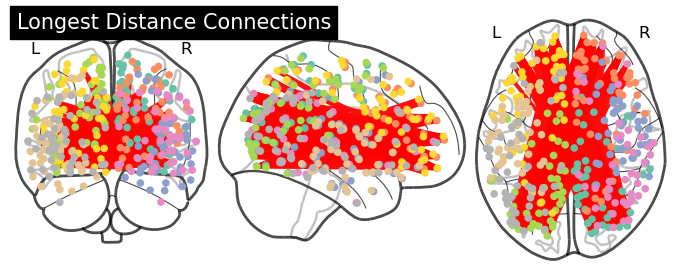

In [32]:
normdistances=(distances-np.min(distances))/(np.max(distances)-np.min(distances))

plotting.plot_connectome(normdistances, atlas["coords"], edge_threshold="99.5%",title="Longest Distance Connections",node_size=20)

We want to make sure that the order didn't get messed up somehow. Let's draw L V1 to R 55b (which is roughly in middle frontal gyrus, close to the motor cortex).

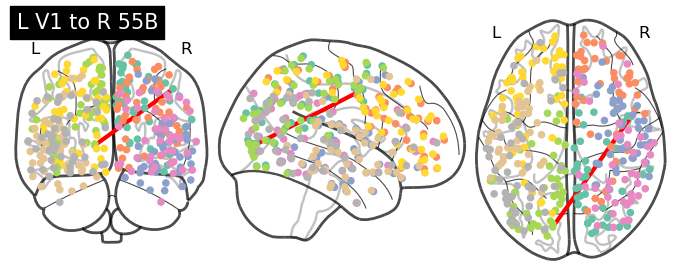

In [33]:
empty=np.zeros((360,360))
I1=region_names.index("L_V1")
I2=region_names.index("R_55b")
empty[(I1,I2)]=1
empty[(I2,I1)]=1
plotting.plot_connectome(empty, atlas["coords"], edge_threshold="99.5%",title="L V1 to R 55B",node_size=20)